In [ ]:
from sympy import *
import numpy as np
import plotly.graph_objects as go

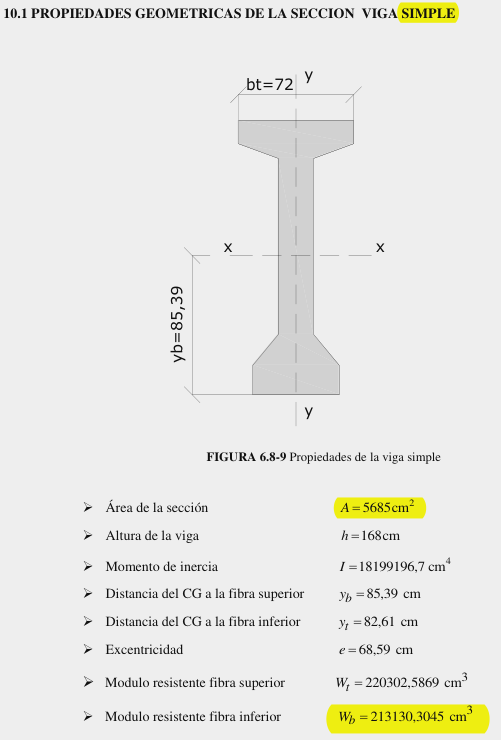

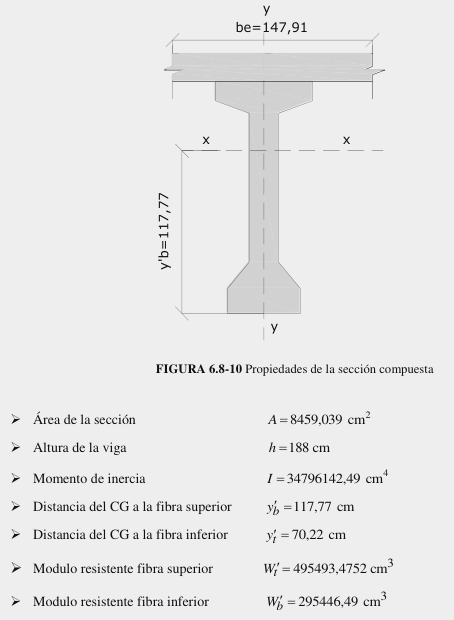

**Datos**

In [ ]:
# Concreto
fc=35

# Propiedades de la seccion
e=68.59 # cm Excentricidad
A=5501 # cm2 Area de la Seccion
wb1=213130.3045 # cm3 Modulo de Seccion 1
I1=18199196.7 # cm4 Inercia de Seccion 1
wb2=295446.49 # cm3 Modulo de Seccion 2

# Momentos
Mpp=103143.75 # KN-m Momento Peso Propio
Mlh=65625 # KN-m Momento Losa Humeda
Mdiaf=5175 # KN-m Momento Diafragma
Mll_im=231148.57 # KN-m Momento Carga Viva
Mdc=24785.16 # KN-m Momento DC
Mdw=6945.31 # KN-m Momento DW

**1. Determinacion del presfuerzo Inicial**

In [ ]:
t=sum([Mpp/(wb1*10**-6),Mlh/(wb2*10**-6),Mdiaf/(wb2*10**-6),Mll_im/(wb2*10**-6),Mdc/(wb2*10**-6),Mdw/(wb2*10**-6)]) # kp/m2
Po=t*wb1*A/(wb1+A*e)*10**-4 # KN Presfuerzo Inicial
print ('Po=',round (Po,2))

**2. Determinacion del area de torones**

In [ ]:
fpu= 18966.80 # kp/cm2 Esfuerzo ultimo del presfuerzo
Au=.987 # cm2 Area de 1 toron
fs=fpu*Au # KN

# Area de Torones
As_tor=Po/(.6*fs) # cm2
# Numero de Torones
n_tor=ceiling(As_tor/Au)
print ('Numero de Torones:',n_tor)
# Area real de Torones
Asr_tor=n_tor*Au
print ('Area de Torones:',round (Asr_tor,2),'cm2')

**3. Calculo de perdidas**

In [ ]:
# Perdida dependiente del tiempo #
per_t=230*(1-.15*(fc-41)/41) # N/mm2 <> Mpa

# Perdidas instantaneas #
fc=25 # Mpa Resistencia del Concreto a una edad mayor a los 28 dias # Segun Libro fc=28

# Acortamiento elastico
Ep=197000 # Mpa Modulo de Elasticidad del Acero de Presfuerzo
fc=25 # Mpa Resistencia del Concreto a una edad menor a los 28 dias
Eci=4700*(fc)**.5 # Mpa Modulo de Elasticidad del Concreto
N=3 # Numero de torones
Pi=Po*9.81+per_t*Asr_tor*100 # N Presfuerzo Inicial
fcgp=((Pi/9.81)/A+(Pi/9.81)*e**2/I1-Mpp*100*e/I1)*9.81/100 # N/mm2
per_acor=(N-1)/(2*N)*(Ep/Eci)*fcgp # N/mm2

# Perdida por friccion
x=12500 # mm Longitud del cable a la mitad
l_mitad=x
l=25
fpi=Pi/(Asr_tor*100) # N/mm2 Esfuerzo de presfuerzo inicial
k=6.6*10**-7
mu=.25
alpha=2*e/(l/2*100) # Revisar
per_fr=fpi*(1-exp(-k*x-mu*alpha)) # N/mm2

# Perdida por anclaje
h=6 # mm Acuñamiento
x=(Ep*h*l_mitad/per_fr)**.5 # mm x > l_mitad
per_an=2*Ep*h/x-2*per_fr # N/mm2

# Suma de perdidas
per_tot=sum([per_t,per_acor,per_fr,per_an]) # N/mm2
Pf=Po+per_tot*Asr_tor*100/9.81 # kgf

# Resultados
print ('Perdida dependiente del tiempo:',round (per_t,2),'N/mm2')
print ('Perdida por acortamiento elastico:',round (per_acor,2),'N/mm2')
print ('Perdida por friccion:',round (per_fr,2),'N/mm2')
print ('Perdida por anclaje:',round (per_an,2),'N/mm2')
print ('--------------------------------------')
print ('Perdida total:',round (per_tot,2),'N/mm2')
print ('Presfuerzo inicial:',round (Po,2),'kgf')
print ('Presfuerzo final:',round (Pf,2),'kgf')

**4. Verificaciones de Tensiones**

In [ ]:
# Estado Inicial
print ('--------------------------------------')
print ('Estado Inicial')
print ('--------------------------------------')
# Fibra Superior
wt1=220302.59 # cm3 Modulo de Seccion Superior
wb1=213130.30 # cm3 Modulo de Seccion Inferior
Pf=423335

fc=280 # kgf/cm2 # El libro considera 280

fti=-.8*fc**.5 # Revisar la Norma !!
if Pf/A-Pf*e/wt1+Mpp*100/wt1 > fti:
    print (round (Pf/A-Pf*e/wt1+Mpp*100/wt1,2),'<',round (fti,2))
    print ('Ok : Fibra Superior (Tension)')
else:
    print (round (Pf/A-Pf*e/wt1+Mpp*100/wt1,2),'>',round (fti,2))
    print ('No Ok: Fibra Superior (Tension)')

print ('--------------------------------------')

# Fibra Inferior
fci=.6*fc # Revisar la Norma !!
if Pf/A+Pf*e/wb1-Mpp*100/wb1 < fci:
    print (round (Pf/A+Pf*e/wb1-Mpp*100/wb1,2),'<',round (fci,2))
    print ('Ok : Fibra Inferior (Compresion)')
else:
    print (round (Pf/A+Pf*e/wb1-Mpp*100/wb1,2),'>',round (fci,2))
    print ('No Ok : Fibra Inferior (Compresion)')
    
# Estado Final
print ('--------------------------------------')
print ('Estado Final')
print ('--------------------------------------')
fc=350 # kgf/cm2 # El libro considera 350 para los 28 dias

# Fibra Superior
wt2=495493.48 # cm3 Modulo de Seccion Superior
fcs=.45*fc # Revisar la Norma !!
if Po/A-Po*e/wt1+(Mpp/wt1+Mlh/wt2+Mdiaf/wt2+Mll_im/wt2+Mdc/wt2+Mdw/wt2)*100 < fcs:
    print (round (Po/A-Po*e/wt1+(Mpp/wt1+Mlh/wt2+Mdiaf/wt2+Mll_im/wt2+Mdc/wt2+Mdw/wt2)*100,2),'<',round (fcs,2))
    print ('Ok : Fibra Superior (Compresion)')
else:
    print (round (Po/A-Po*e/wt1+(Mpp/wt1+Mlh/wt2+Mdiaf/wt2+Mll_im/wt2+Mdc/wt2+Mdw/wt2)*100,2),'>',round (fcs,2))
    print ('No Ok : Fibra Superior (Compresion)')

print ('--------------------------------------')

# Fibra Inferior
fts=-1.59*fc**.5 # Revisar la Norma !!
if Po/A+Po*e/wb1-(Mpp/wb1+Mlh/wb2+Mdiaf/wb2+Mll_im/wb2+Mdc/wb2+Mdw/wb2)*100 > fts:
    print (round (Po/A+Po*e/wb1-(Mpp/wb1+Mlh/wb2+Mdiaf/wb2+Mll_im/wb2+Mdc/wb2+Mdw/wb2)*100,2),'<',round (fts,2))
    print ('Ok : Fibra Inferior (Tension)')
else:
    print (round (Po/A+Po*e/wb1-(Mpp/wb1+Mlh/wb2+Mdiaf/wb2+Mll_im/wb2+Mdc/wb2+Mdw/wb2)*100,2),'>',round (fts,2))
    print ('No Ok : Fibra Inferior (Tension)')

**5. Armadura del postensado**

In [ ]:
# Numero de vainas
n_vainas=ceiling(n_tor/12)
inicio=9 # Impar
A_v1=inicio*Au # cm2 Area de 1 vaina
A_v2=(n_tor-inicio)/2*Au # cm2 Area de 1 vaina
A_v3=(n_tor-inicio)/2*Au # cm2 Area de 1 vaina

print ('--------------------------------------')
print ('Numero de vainas:',n_vainas)
print ('Area de vaina 1:',round (A_v1,2),'cm2')
print ('Area de vaina 2:',round (A_v2,2),'cm2')
print ('Area de vaina 3:',round (A_v3,2),'cm2')
print ('--------------------------------------')

In [334]:
# Apoyo
A_v1=8.88
A_v2=11.84
A_v3=11.84
y=symbols('y') # cm Verificar !!
y=solve(Eq(A_v1*y,A_v2*(30-y)+A_v3*(60-y)),y)
y=y[0]
print ('y=',round (y,2),'cm')
yb=85.39 # cm Centro de Gravedad de la Viga Simple
y1=y+yb
y2=y1-30
y3=y2-30
print ('y1=',round (y1,2),'cm')
print ('y2=',round (y2,2),'cm')
print ('y3=',round (y3,2),'cm')


y= 32.73 cm
y1= 118.12 cm
y2= 88.12 cm
y3= 58.12 cm


In [335]:

# Centro
e=68.59 # cm Excentricidad
y=symbols('y') # cm Verificar !!
y=solve(Eq(A_v1*y+A_v2*(y+7.3)+A_v3*(y+14.6),e*Asr_tor),y)
y=y[0]
yb=85.39 # cm Centro de Gravedad de la Viga Simple
a=yb-y-14.6
b=yb-y-7.3
c=yb-y
print ('y=',round (y,2),'cm')
print ('a=',round (a,2),'cm')
print ('b=',round (b,2),'cm')
print ('c=',round (c,2),'cm')

y= 52.33 cm
a= 18.46 cm
b= 25.76 cm
c= 33.06 cm


In [355]:
# Ecuacion Parabola
l=25 # m

# Grafica

x=np.linspace(0,l,l+1)
# Vaina 1
y_v1=2/l**2*(y1-2*c+y1)*x**2+1/l*(-3*y1+4*c-y1)*x+y1
# Vaina 2
y_v2=2/l**2*(y2-2*b+y2)*x**2+1/l*(-3*y2+4*b-y2)*x+y2
# Vaina 3
y_v3=2/l**2*(y3-2*a+y3)*x**2+1/l*(-3*y3+4*a-y3)*x+y3

fig=go.Figure()
fig.add_trace(go.Scatter(x=x,y=y_v1,name='Vaina 1',mode='lines+markers',line=dict(color='magenta', width=1)))
fig.add_trace(go.Scatter(x=x,y=y_v2,name='Vaina 2',mode='lines+markers',line=dict(color='royalblue', width=1)))
fig.add_trace(go.Scatter(x=x,y=y_v3,name='Vaina 3',mode='lines+markers',line=dict(color='black', width=1)))